# Classification Problem - Wine Quality Classification
### In this notebook, I will classify differents variants of red wine by bad and good quality.

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Reviews               1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


### Let's check how many variants there are for each quality rating:

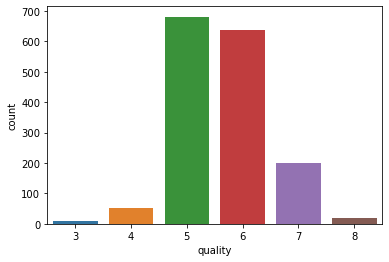

In [4]:
sns.countplot(x='quality', data=df)

### There is a normal distribution situation - there are more variants with average quality than variants with high or low quality. 
### Correlation Matrix: 

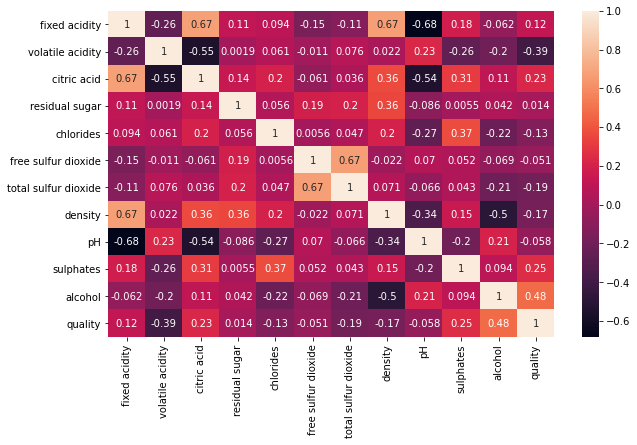

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

### We can see that alcohol has the best correlation with the quality (although far from perfect).
### In order to balance things out, I decided to devide the data to two groups: poor to average quality (3-5), and average to high quality (6-8).

In [9]:
reviews = []
for i in df['quality']:
    if i <= 5:
        reviews.append('1')
    elif i >= 6:
        reviews.append('2')
df['Reviews'] = reviews

### How many variants in each group:

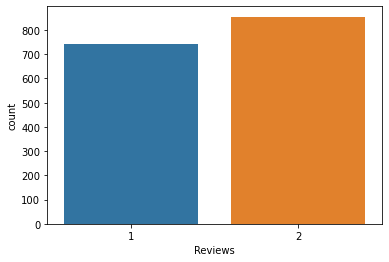

In [10]:
sns.countplot(x='Reviews', data=df)

In [24]:
good_qual = len(df[df['Reviews'] == '2'])
bad_qual = len(df[df['Reviews'] == '1'])
print("Good quality wine: ", good_qual / len(df))
print("Poor quality wine: ", bad_qual / len(df))

Good quality wine:  0.5347091932457786
Poor quality wine:  0.4652908067542214


### There's a bit more wine of average to high quality.
### Let's check the correlation between alcohol and quality:

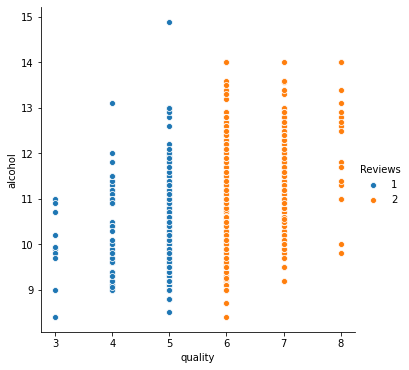

In [34]:
sns.pairplot(df, x_vars = ["quality"], y_vars =["alcohol"], hue = "Reviews", height =5)  

### In a few cases, if the wine contains more alcohol, it is of better quality (except for one outlier).

## Split to Training and Testing

In [12]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, 0:11]
y = df.iloc[:, 12]
target = df['Reviews']
x_train, x_test, y_train, y_test = train_test_split(df,target, test_size=0.2)

## Model - K Nearest Neighbours
### K = 1 was the optimal option.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

## Accuracy Check

              precision    recall  f1-score   support

           1       0.82      0.84      0.83       139
           2       0.88      0.86      0.87       181

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320

Accuracy:  0.85


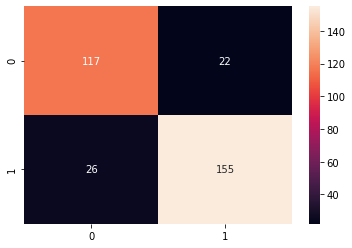

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
confmat = confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, annot = True, fmt = "d")
result1 = classification_report(y_test, y_pred)
result2 = accuracy_score(y_test, y_pred)
print(result1)
print("Accuracy: ", result2)

## Model - Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
tree.score(x_test,y_test)

1.0

In [17]:
from sklearn.ensemble import RandomForestClassifier

random = DecisionTreeClassifier()

random.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
random.score(x_test,y_test)

1.0

# FIN